<a href="https://colab.research.google.com/github/kunalrajsingh/Airline_Review_System/blob/main/new_airline_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from wordcloud import WordCloud

In [ ]:
# Read data
df = pd.read_csv('BA_AirlineReviews.csv')
print(df.shape)

(3701, 20)


In [ ]:
pip install pandas

In [ ]:
df=pd.read_csv("BA_AirlineReviews.csv")

In [ ]:
print(df)

      Unnamed: 0  OverallRating                              ReviewHeader  \
0              0            1.0    "Service level far worse then Ryanair"   
1              1            3.0  "do not upgrade members based on status"   
2              2            8.0             "Flight was smooth and quick"   
3              3            1.0             "Absolutely hopeless airline"   
4              4            1.0        "Customer Service is non existent"   
...          ...            ...                                       ...   
3696        3696            1.0           British Airways customer review   
3697        3697            9.0           British Airways customer review   
3698        3698            5.0           British Airways customer review   
3699        3699            4.0           British Airways customer review   
3700        3700            4.0           British Airways customer review   

                  Name            Datetime  VerifiedReview  \
0            

In [ ]:
print(df.shape)

(3701, 20)


In [ ]:
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [ ]:
#data processing


In [ ]:
#renaming column to ID
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
df.columns

Index(['Id', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [ ]:
df.describe()

,Id,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Id,0
OverallRating,5
ReviewHeader,0
Name,0
Datetime,0
VerifiedReview,0
ReviewBody,0
TypeOfTraveller,771
SeatType,2
Route,775


In [ ]:
# sentimentral analysis and word cloud
df_1 = df[['Id', 'OverallRating', 'ReviewHeader', 'Datetime',
       'VerifiedReview', 'ReviewBody']]

# Analize numerical values
df_2 = df[['Id', 'OverallRating',
       'TypeOfTraveller', 'SeatType', 'Route', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity']]

In [ ]:
df_1.isnull().sum()

,0
Id,0
OverallRating,5
ReviewHeader,0
Datetime,0
VerifiedReview,0
ReviewBody,0


In [ ]:
df_1.dropna(inplace=True)

<ipython-input-15-6f50d9b9de7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace=True)


In [ ]:
df_1.isnull().sum()

,0
Id,0
OverallRating,0
ReviewHeader,0
Datetime,0
VerifiedReview,0
ReviewBody,0


In [ ]:
# remove St, nd, rd from date
def stripDate(date_str):
    return date_str.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '')

In [ ]:
# ix month name in date
month_mapping = {
    'Augu': 'August',
}

def makeDate(date_str):
    for month_abbr, month_full in month_mapping.items():
        if month_abbr in date_str:
            date_str = date_str.replace(month_abbr, month_full)
            break
    return datetime.strptime(date_str, "%d %B %Y")

In [ ]:
df['Datetime'] = df['Datetime'].apply(stripDate)

In [ ]:
df['Datetime'] = df['Datetime'].apply(makeDate)

In [ ]:
df_2.isnull().sum()

,0
Id,0
OverallRating,5
TypeOfTraveller,771
SeatType,2
Route,775
SeatComfort,116
CabinStaffService,127
GroundService,846
ValueForMoney,1
Recommended,0


In [ ]:
df_2 = df_2.drop(columns=["Wifi&Connectivity", "Aircraft", "InflightEntertainment"])
df_2.dropna(inplace=True)
df_2.isnull().sum()

,0
Id,0
OverallRating,0
TypeOfTraveller,0
SeatType,0
Route,0
SeatComfort,0
CabinStaffService,0
GroundService,0
ValueForMoney,0
Recommended,0


In [ ]:
df_2.shape

(2531, 11)

In [ ]:
#data_visualizing


<Axes: xlabel='SeatType', ylabel='count'>

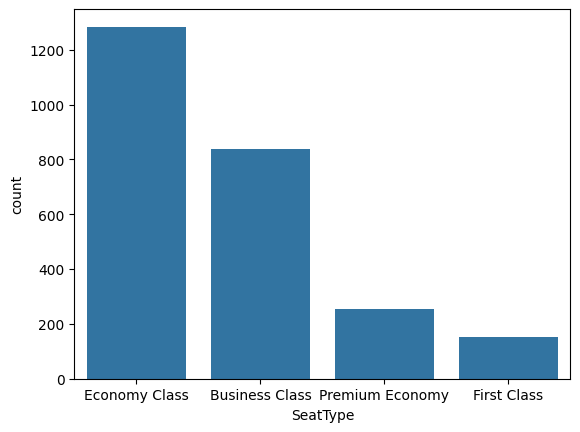

In [ ]:
import seaborn as sns
# Assuming 'df_2' is your DataFrame containing the data
# and 'SeatType' is a column within that DataFrame.
sns.countplot(x='SeatType', data=df_2)

<Axes: xlabel='SeatType', ylabel='count'>

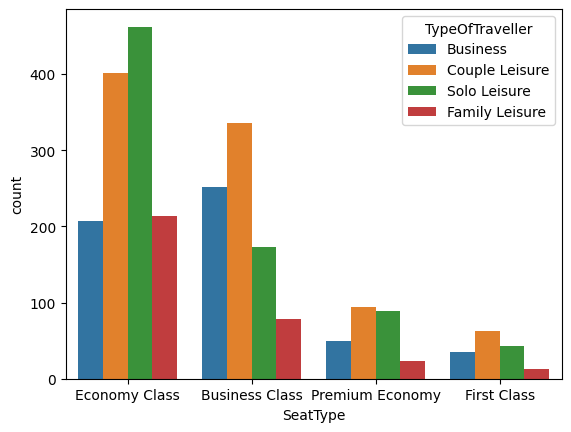

In [ ]:
import seaborn as sns
# Assuming 'df_2' is your DataFrame containing the data
# and 'SeatType' is a column within that DataFrame.

# Replace 'data' with 'df_2' if you intend to use the df_2 DataFrame.
sns.countplot(x='SeatType', hue='TypeOfTraveller', data=df_2)

Text(0.5, 1.0, 'rating of seat comfort')

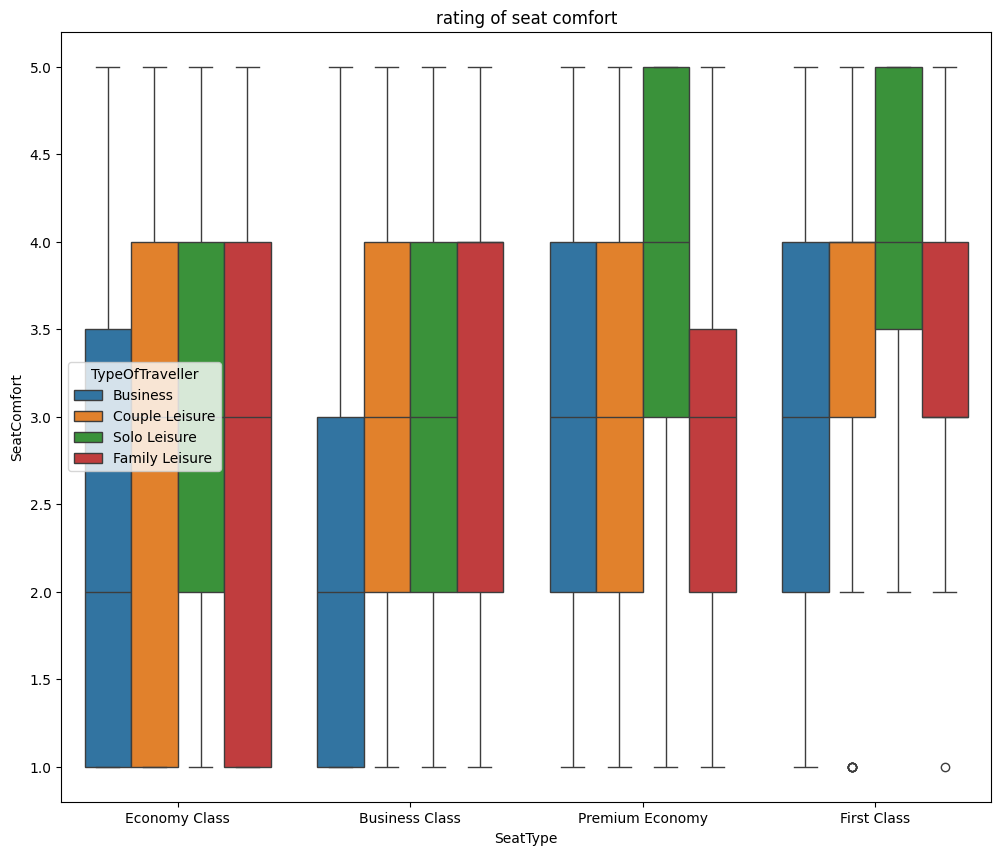

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
# Assuming 'df_2' is the DataFrame containing your data:
sns.boxplot(x='SeatType', y='SeatComfort', hue='TypeOfTraveller', data=df_2).set_title('rating of seat comfort')

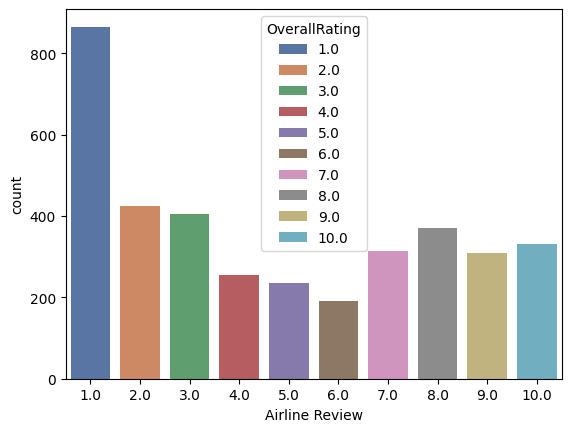

In [ ]:
# overall rating plot
sns.countplot(data=df_1, x='OverallRating', hue='OverallRating', palette='deep')
plt.xlabel('Airline Review')
plt.show()

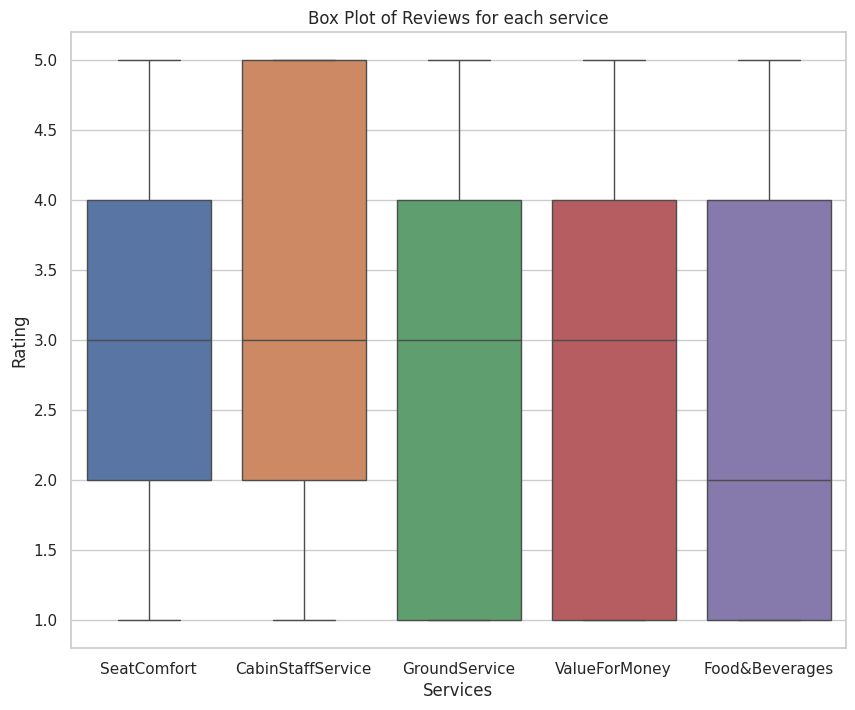

In [ ]:
# plotting the services vs rating in a boxplot to observe the spread of the ratings
df_boxplt = df_2[[ 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages']]

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_boxplt, palette='deep')
plt.xlabel('Services')
plt.ylabel('Rating')
plt.title('Box Plot of Reviews for each service')

plt.show()

In [ ]:
# plot seperate graphs for verified and non verified users to see if there is any bias
df_verified = df_1[df_1["VerifiedReview"] == True]
df_nonverified = df_1[df_1["VerifiedReview"] == False]

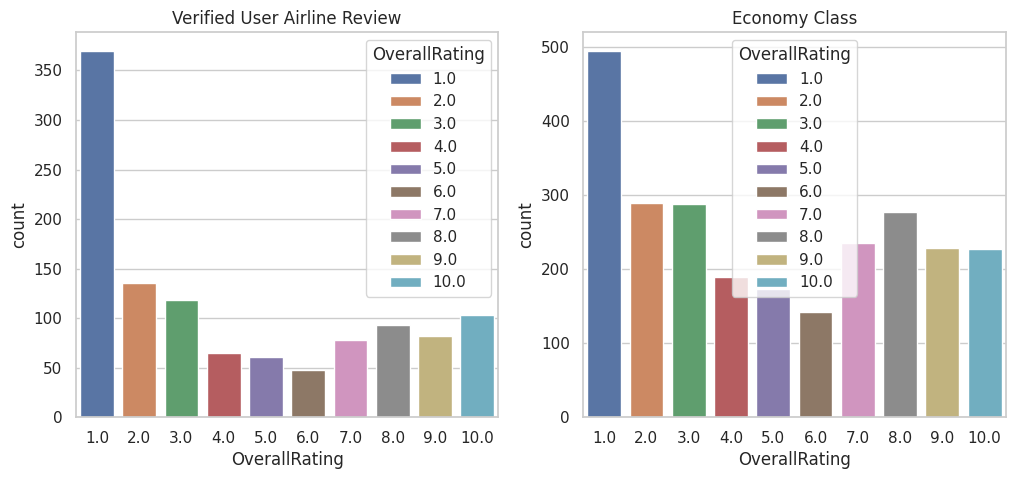

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot for verified users
sns.countplot(data=df_verified, x='OverallRating', hue='OverallRating', ax = axs[0], palette='deep')
axs[0].set_title("Verified User Airline Review")

# plot for non-verified users
sns.countplot(data=df_nonverified, x='OverallRating', hue='OverallRating', ax = axs[1], palette='deep')
axs[1].set_title("Economy Class")

plt.show()

In [ ]:
# plot seperate graphs for different seat types to see if there is any bias
df_economy = df_2[df_2["SeatType"] == 'Economy Class']
df_business = df_2[df_2["SeatType"] == 'Business Class']
df_premium = df_2[df_2["SeatType"] == 'Premium Economy']
df_first = df_2[df_2["SeatType"] == 'First Class']

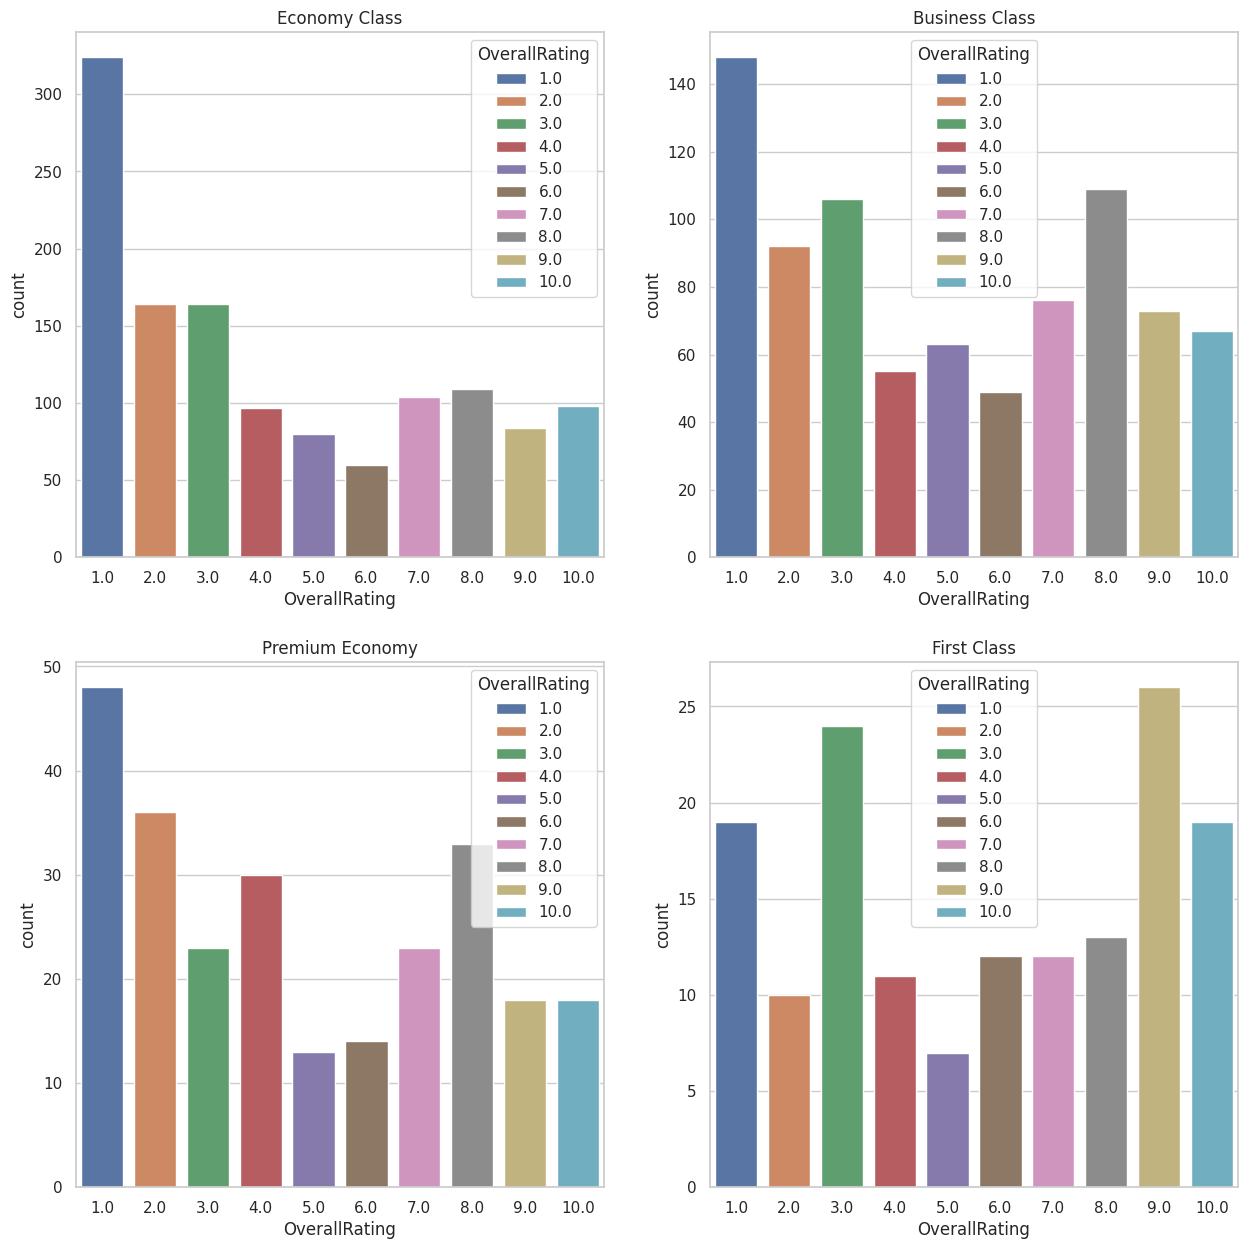

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plot for Economy Class
sns.countplot(data=df_economy, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[0][0])
axs[0][0].set_title("Economy Class")

# plot for Business Class
sns.countplot(data=df_business, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[0][1])
axs[0][1].set_title("Business Class")

# plot for Premium Economy
sns.countplot(data=df_premium, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[1][0])
axs[1][0].set_title("Premium Economy")


# plot for First Class
sns.countplot(data=df_first, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[1][1])
axs[1][1].set_title("First Class")

plt.show()

<Axes: xlabel='Recommended', ylabel='count'>

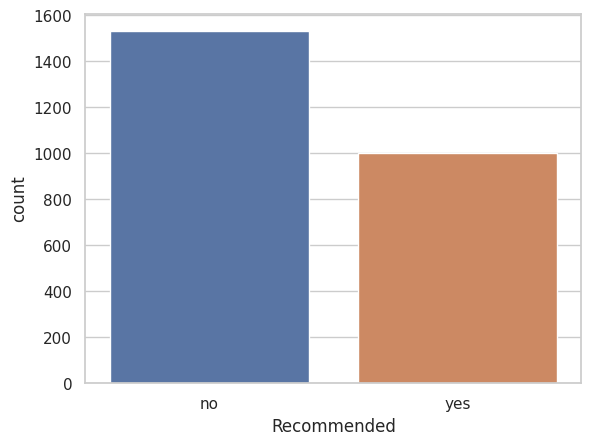

In [ ]:
sns.countplot(data=df_2, x='Recommended', hue='Recommended')

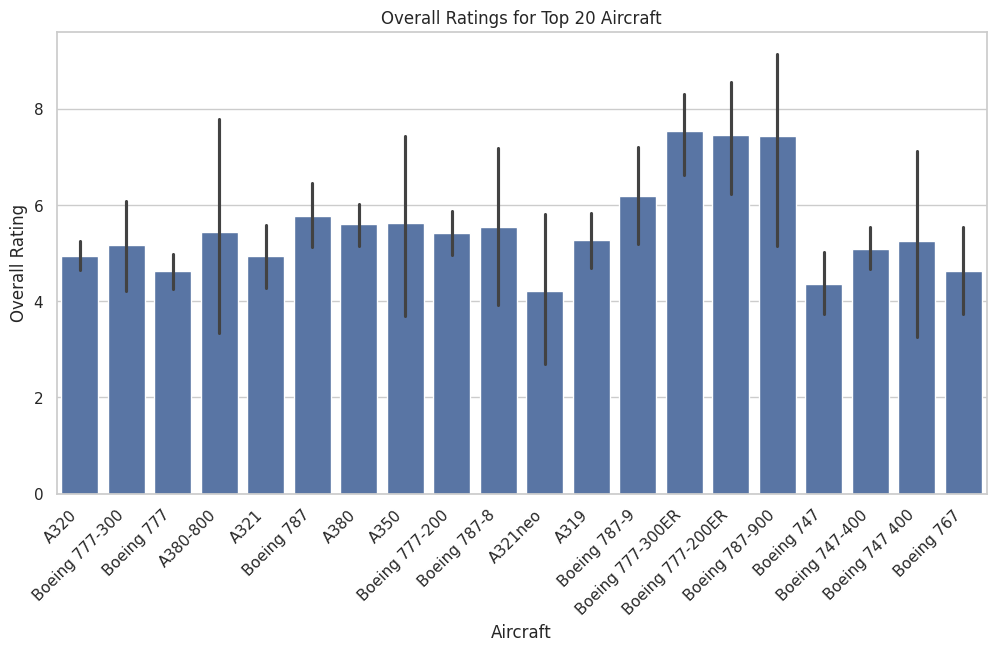

In [ ]:
# Assuming your data is in a CSV file named 'your_data.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into the 'data' variable
data = pd.read_csv('BA_AirlineReviews.csv')

aircraft_column = data["Aircraft"]
overall_rating_column = data["OverallRating"]

top_20_aircraft = aircraft_column.value_counts().head(20).index

filtered_data = data[data["Aircraft"].isin(top_20_aircraft)]

plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_data['Aircraft'],y=filtered_data['OverallRating'])
plt.title('Overall Ratings for Top 20 Aircraft')
plt.xlabel('Aircraft')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right');

In [ ]:
#SENTIMENT ANALYSIS

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

from tqdm.notebook import tqdm

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" # pre-trained model on twitter data
tokenizer = AutoTokenizer.from_pretrained(MODEL) # tokenizer fro the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)  # load the pre-trained model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# function to take in a text input and return the scores
def polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'neg' : scores[0],
        'neu' : scores[1],
        'pos' : scores[2]
    }
    return scores_dict

In [ ]:
import pandas as pd # import pandas to work with dataframes

# load your data into a pandas DataFrame called df_1
df_1 = pd.read_csv('/content/BA_AirlineReviews.csv')

df_1.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
# negative review
nh = df_1["ReviewHeader"][0]
nb = df_1["ReviewBody"][0]

# positive review
ph = df_1["ReviewHeader"][2]
pb = df_1["ReviewBody"][2]

In [ ]:
# scores for values
print("Negative review header :", polarity_scores(nh))
print("Negative review body :", polarity_scores(nb))
print("Positive review header :", polarity_scores(ph))
print("Positive review body :", polarity_scores(pb))

Negative review header : {'neg': 0.9159302, 'neu': 0.07640026, 'pos': 0.007669592}
Negative review body : {'neg': 0.8934978, 'neu': 0.09517489, 'pos': 0.01132721}
Positive review header : {'neg': 0.013032665, 'neu': 0.40567276, 'pos': 0.5812946}
Positive review body : {'neg': 0.033574883, 'neu': 0.24359585, 'pos': 0.7228292}


In [ ]:
#From this we can observe that the fucntion polarity_scores is doing a good job on sample data

#lets apply this to entire data set

In [ ]:
res = {}
for i, row in tqdm(df_1.iterrows(), total=len(df_1)):
    try:
        text = row['ReviewBody']
        # The DataFrame likely has a column named 'Unnamed: 0' instead of 'Id'
        # You need to change the column name to 'Unnamed: 0' to fetch the identifier
        myid = row['Unnamed: 0']
        result = polarity_scores(text)
        res[myid] = result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/3701 [00:00<?, ?it/s]

Broke for id 34
Broke for id 67
Broke for id 89
Broke for id 134
Broke for id 148
Broke for id 203
Broke for id 208
Broke for id 227
Broke for id 250
Broke for id 258
Broke for id 336
Broke for id 356
Broke for id 421
Broke for id 480
Broke for id 502
Broke for id 557
Broke for id 626
Broke for id 627
Broke for id 764
Broke for id 788
Broke for id 821
Broke for id 921
Broke for id 945
Broke for id 1009
Broke for id 1021
Broke for id 1077
Broke for id 1092
Broke for id 1109
Broke for id 1114
Broke for id 1119
Broke for id 1130
Broke for id 1194
Broke for id 1200
Broke for id 1201
Broke for id 1255
Broke for id 1330
Broke for id 1359
Broke for id 1379
Broke for id 1382
Broke for id 1383
Broke for id 1387
Broke for id 1399
Broke for id 1402
Broke for id 1417
Broke for id 1437
Broke for id 1450
Broke for id 1484
Broke for id 1505
Broke for id 1506
Broke for id 1526
Broke for id 1535
Broke for id 1552
Broke for id 1594
Broke for id 1631
Broke for id 1632
Broke for id 1700
Broke for id 1741


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Unnamed: 0'}) # Change 'Id' to 'Unnamed: 0' to match df_1
results_df = results_df.merge(df_1, how='left', on='Unnamed: 0') # Specify 'Unnamed: 0' as the common column for merging

In [ ]:
results_df.head()

,Unnamed: 0,neg,neu,pos,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,...,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,0.893498,0.095175,0.011327,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,...,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,0.912927,0.078364,0.008709,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,...,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,0.033575,0.243596,0.722829,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",...,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,0.853441,0.129987,0.016573,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",...,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,0.901762,0.086658,0.011580,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",...,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
results_df.columns

Index(['Unnamed: 0', 'neg', 'neu', 'pos', 'OverallRating', 'ReviewHeader',
       'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller',
       'SeatType', 'Route', 'DateFlown', 'SeatComfort', 'CabinStaffService',
       'GroundService', 'ValueForMoney', 'Recommended', 'Aircraft',
       'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

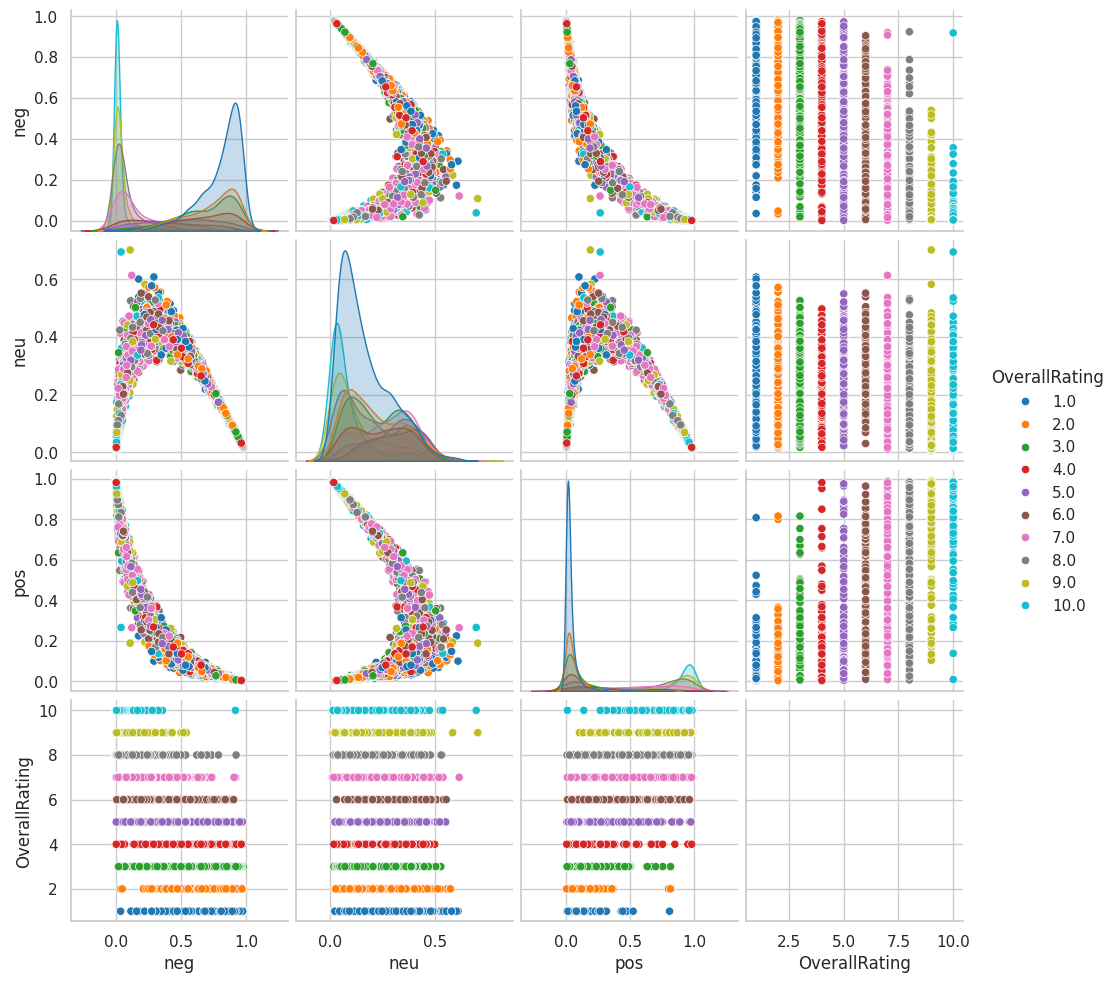

In [ ]:
# lets try a pair plot to see coorealtion between columns
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos', 'OverallRating'],
            hue='OverallRating',
            palette='tab10')
plt.show()

In [ ]:
#Sentiment Model Creation:

In [ ]:
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

%matplotlib inline

In [ ]:
df = pd.read_csv('BA_AirlineReviews.csv')
df

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,1.0,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,NaN,Economy Class,NaN,NaN,3.0,1.0,NaN,3.0,no,NaN,2.0,NaN,NaN
3697,3697,9.0,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,4.0,5.0,NaN,3.0,yes,NaN,4.0,NaN,NaN
3698,3698,5.0,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,NaN,NaN,NaN,NaN
3699,3699,4.0,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,1.0,3.0,NaN,1.0,no,NaN,5.0,NaN,NaN


In [ ]:
print(df['ReviewHeader'].iloc[0])

"Service level far worse then Ryanair"


In [ ]:
print(df['ReviewBody'].iloc[0])

4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.


In [ ]:
%pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
print(analyzer.polarity_scores(df['ReviewHeader'].iloc[0])) # "Service level far worse then Ryanair"
print(analyzer.polarity_scores(df['ReviewBody'].iloc[0]))

{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.176, 'neu': 0.756, 'pos': 0.068, 'compound': -0.9342}


In [ ]:
print(df['ReviewHeader'].iloc[3700])
print(analyzer.polarity_scores(df['ReviewHeader'].iloc[3700]))


British Airways customer review
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
# list creation
headers_score = []
# comparision of review headlines vs review body
for header in df['ReviewHeader']:
    sentiment = analyzer.polarity_scores(header)
    headers_score.append(sentiment['compound'])

In [ ]:
body_score = []
for body in df['ReviewBody']:
    sentiment_two = analyzer.polarity_scores(body)
    body_score.append(sentiment_two['compound'])

In [ ]:
df['sentiment'] = headers_score
df['sentiment_two'] = body_score

Text(0, 0.5, 'Frequency')

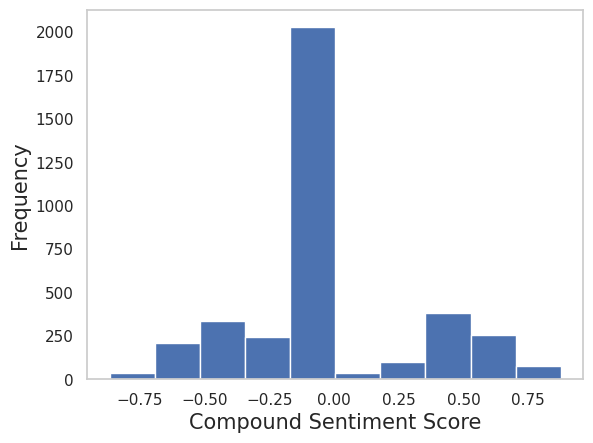

In [ ]:
# headers
df['sentiment'].hist(grid=False)
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Frequency')

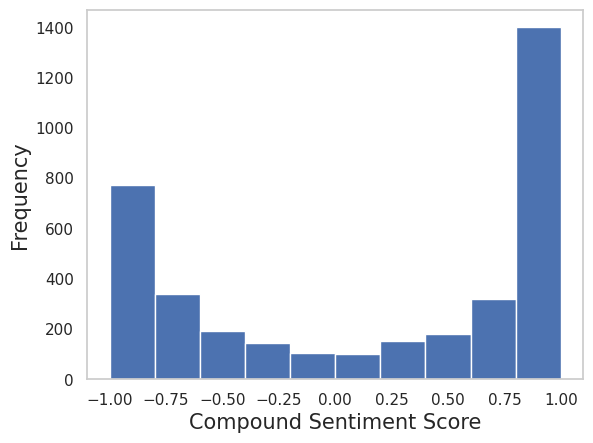

In [ ]:
# review body
df['sentiment_two'].hist(grid=False)
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)